In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob

cols=plt.rcParams['axes.prop_cycle'].by_key()['color']

import sys
sys.path.append('functions/')

import importlib
import myfuncs as myf
import Hf_Q as HF_Q

importlib.reload(myf)
importlib.reload(HF_Q)

<module 'Hf_Q' from '/Users/pietromariabonetti/Documents/postdoc/Lieb_lattice/scripts/functions/Hf_Q.py'>

In [3]:
U_l=[]
qx_l=[]
qy_l=[]

Dd_l=[]
Dpx_l=[]
Dpy_l=[]

a_d_l=[]
a_px_l=[]
a_py_l=[]

mu_l=[]
mud_l=[]
mupx_l=[]
mupy_l=[]
nd_l=[]
npx_l=[]
npy_l=[]

for ss in np.sort(glob.glob('../data/runs/run_U_*')):
    U_str=ss[19:]
    UU=float(U_str)
    file='../data/runs/run_U_%.3f/output.txt' %UU
    
    data=np.loadtxt(file,unpack=True)
    #0 1   2   3  4   5    6    7       8        9        10           11            12
    #F,qqx,qqy,mu,mud,mupx,mupy,abs(Dd),abs(Dpx),abs(Dpy),np.angle(Dd),np.angle(Dpx),np.angle(Dpy)
    #if(UU<4.60):
    #    print('small U')
    #    data=data[:,20:41]
    F=data[0]
    Qx=data[1]
    Qy=data[2]
    
    Dd=data[7]
    Dpx=data[8]
    Dpy=data[9]
    
    a_d=data[10]
    a_px=data[11]
    a_py=data[12]

    mu=data[3]
    nd=-(data[4]-mu)/UU
    npx=-(data[5]-mu)/UU
    npy=-(data[6]-mu)/UU

    mud=data[4]
    mupx=data[5]
    mupy=data[6]

    #F -= (UU/2) * ( (Dd/UU)**2+(Dpx/UU)**2+(Dpy/UU)**2 - nd**2 - npx**2 - npy**2 )
    
    idx=np.argmin(F)
    if (UU==4.30 or UU==4.40):
        idx=0
    if (UU in [4.60,4.70,4.80,4.90]):
        ins  = np.arange(0,Qx.shape[0])
        mask = np.logical_and(Qx==np.pi,Qy==0)
        idx = ins[mask][0]
    if (UU in [5.10,5.20,5.30,5.40] or UU>=8):
        ins  = np.arange(0,Qx.shape[0])
        mask = np.logical_and(Qx==0,Qy==0)
        idx = ins[mask][0]
    
    
    U_l.append(UU)
    mu_l.append(mu[idx])
    qx_l.append(Qx[idx])
    qy_l.append(Qy[idx])
    Dd_l.append(Dd[idx])
    Dpx_l.append(Dpx[idx])
    Dpy_l.append(Dpy[idx])
    a_d_l.append(a_d[idx])
    a_px_l.append(a_px[idx])
    a_py_l.append(a_py[idx])

    nd_l.append(nd[idx])
    npx_l.append(npx[idx])
    npy_l.append(npy[idx])
    mud_l.append(mud[idx])
    mupx_l.append(mupx[idx])
    mupy_l.append(mupy[idx])
    
    str1='(%.2f,%.2f)  ' %(Qx[idx]/np.pi,Qy[idx]/np.pi)
    str2='(%.3f, %.3f, %.3f)  ' %(Dd[idx],Dpx[idx],Dpy[idx])
    str3='(%.3f, %.3f)  %.3f  ' %( (a_px[idx]-a_d[idx])/np.pi,(a_py[idx]-a_d[idx])/np.pi, a_d[idx]/np.pi )
    print(UU,str1+str2+str3)

U_l=np.array(U_l)
mu_l=np.array(mu_l)
qx_l=np.array(qx_l)
qy_l=np.array(qy_l)
Dd_l=np.array(Dd_l)
Dpx_l=np.array(Dpx_l)
Dpy_l=np.array(Dpy_l)
a_d_l=np.array(a_d_l)
a_px_l=np.array(a_px_l)
a_py_l=np.array(a_py_l)

3.75 (1.00,0.50)  (0.004, 0.004, 0.002)  (0.177, 1.000)  -0.936  
3.875 (0.85,0.00)  (0.020, 0.047, 0.006)  (-0.000, -1.000)  0.256  
4.0 (0.85,0.00)  (0.034, 0.090, 0.012)  (0.000, 1.000)  -0.870  
4.125 (0.90,0.00)  (0.050, 0.193, 0.018)  (-0.001, -1.001)  0.030  
4.25 (1.00,0.30)  (0.003, 0.330, 0.001)  (-0.245, 1.004)  -0.603  
4.375 (1.00,0.15)  (0.003, 0.444, 0.000)  (0.518, -1.002)  0.228  
4.5 (1.00,0.00)  (0.003, 0.522, 0.000)  (-1.514, -0.978)  0.875  
4.625 (1.00,0.00)  (0.002, 0.583, 0.000)  (0.753, -0.918)  0.016  
4.75 (1.00,0.00)  (0.002, 0.646, 0.001)  (-0.318, -0.338)  0.989  
4.875 (1.00,0.00)  (0.003, 0.708, 0.000)  (1.158, 0.248)  -0.956  
5.0 (1.00,0.00)  (0.003, 0.770, 0.000)  (0.378, -1.419)  0.483  
5.125 (1.00,0.00)  (0.003, 0.832, 0.000)  (0.503, -0.989)  0.244  
5.25 (1.00,0.00)  (0.003, 0.895, 0.000)  (0.477, 0.922)  0.044  
5.375 (1.00,0.00)  (0.003, 0.956, 0.000)  (-0.483, 0.990)  -0.050  
5.5 (1.00,0.00)  (0.003, 1.018, 0.001)  (-0.414, -0.167)  -0.153  


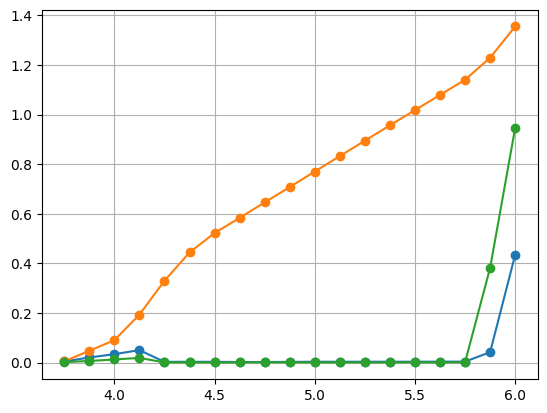

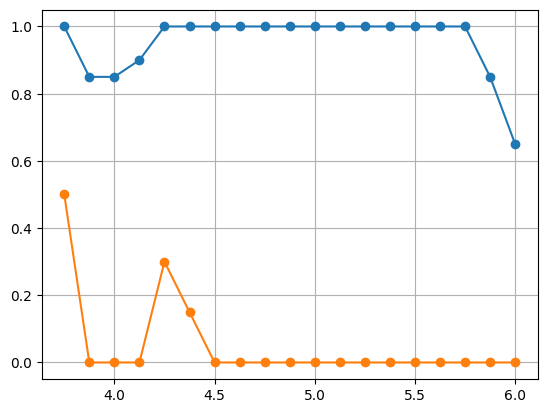

In [4]:
mask=np.logical_and(U_l>=3.5,U_l<=9)

plt.plot(U_l[mask],Dd_l[mask],'o-')
plt.plot(U_l[mask],Dpx_l[mask],'o-')
plt.plot(U_l[mask],Dpy_l[mask],'o-')
plt.grid()
plt.show()

plt.plot(U_l[mask],np.array(qx_l[mask])/np.pi,'o-')
plt.plot(U_l[mask],np.array(qy_l[mask])/np.pi,'o-')
plt.grid()
plt.show()

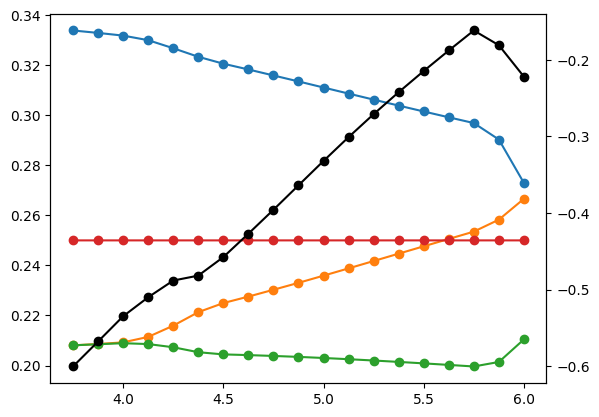

In [4]:
plt.plot(U_l,nd_l,'o-')
plt.plot(U_l,npx_l,'o-')
plt.plot(U_l,npy_l,'o-')
plt.plot(U_l,(np.array(nd_l)+np.array(npx_l)+np.array(npy_l))/3,'o-')

ax2=plt.twinx()
ax2.plot(U_l,mu_l,'o-',c='black')
#plt.xlim(3.5,4.6)
#plt.ylim(0,0.1)

In [11]:
U=4.5
file='../data/runs/run_U_%.3f/output.txt' %U

data=np.loadtxt(file,unpack=True)
#0 1   2   3  4   5    6    7       8        9        10           11            12
#F,qqx,qqy,mu,mud,mupx,mupy,abs(Dd),abs(Dpx),abs(Dpy),np.angle(Dd),np.angle(Dpx),np.angle(Dpy)
F=data[0]
Qx=data[1]
Qy=data[2]

Dd=data[7]
Dpx=data[8]
Dpy=data[9]

a_d=data[10]
a_px=data[11]
a_py=data[12]

mu=data[3]
nd=-(data[4]-mu)/UU
npx=-(data[5]-mu)/UU
npy=-(data[6]-mu)/UU

#F -= (UU/2) * ( (Dd/UU)**2+(Dpx/UU)**2+(Dpy/UU)**2 - nd**2 - npx**2 - npy**2 )
idx=np.argmin(F)

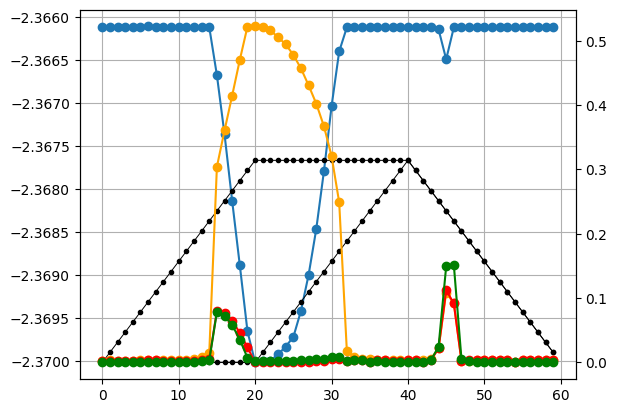

In [12]:
plt.plot(F,'o-')
plt.grid()
#plt.ylim(-3.348,-3.345)

#'''
ax2=plt.twinx()
ax2.plot(Dpx,'o-',c='orange')
ax2.plot(Dpy,'o-',c='red')
ax2.plot(Dd,'o-',c='green')

ax2.plot(0.1*Qx,'o-',c='black',zorder=0,markersize=3,lw=0.7)
ax2.plot(0.1*Qy,'o-',c='black',zorder=0,markersize=3,lw=0.7)
#'''

#plt.xlim(8,28)
#plt.xlim(0,20)


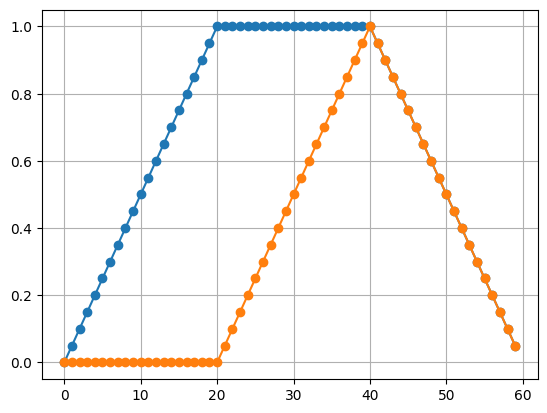

In [13]:
i1=0
i2=-1
plt.plot(Qx[:]/np.pi,'o-')
plt.plot(Qy[:]/np.pi,'o-')
plt.grid()

In [44]:
special_vls = [4,4.5,5,5.5,6,6.5,7,7.5,8]

for ii in range(U_l.shape[0]):
    if (U_l[ii] in special_vls):
        print(ii,U_l[ii],'here')

5 4.0 here
10 4.5 here
15 5.0 here
20 5.5 here
25 6.0 here
30 6.5 here
35 7.0 here
40 7.5 here
45 8.0 here


1.4994523241509556


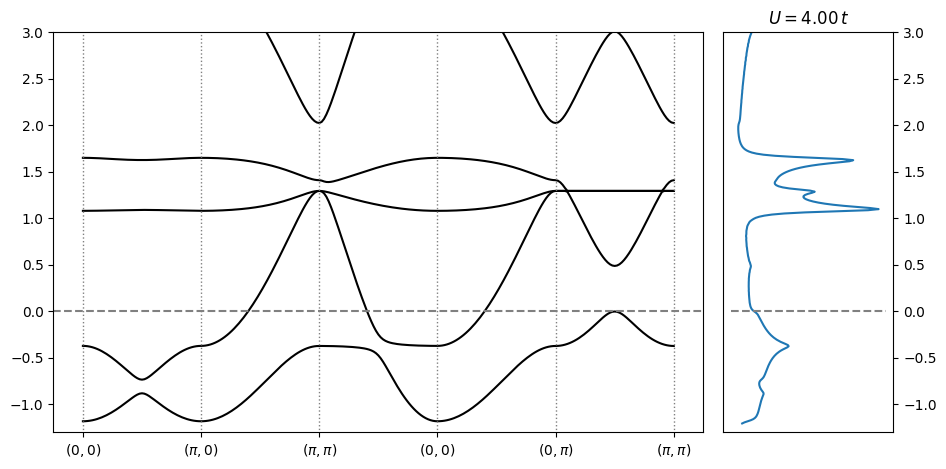

1.4990293482222732


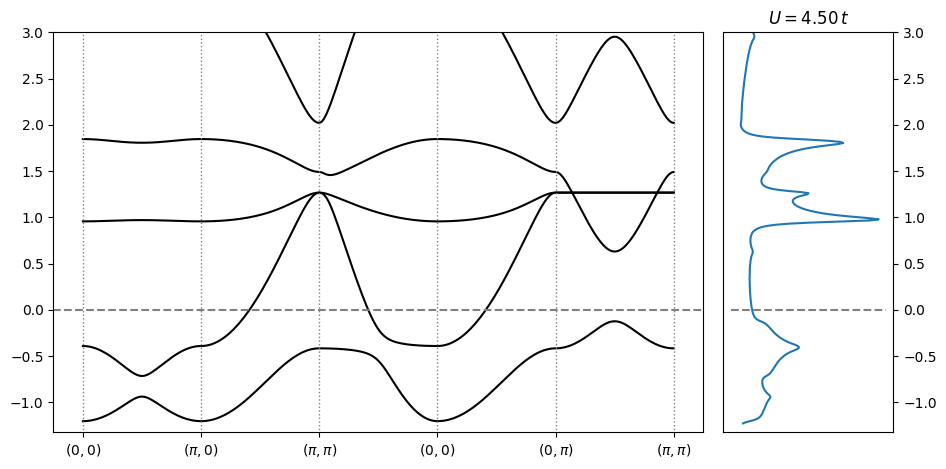

1.4991000486411359


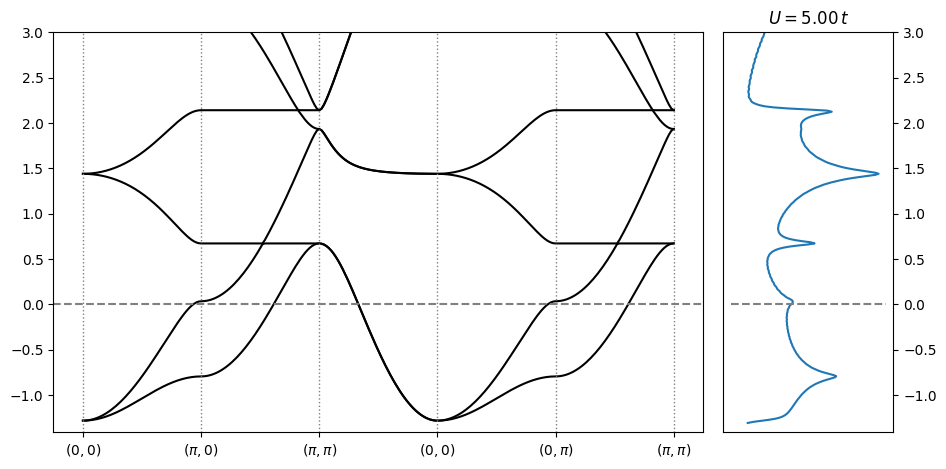

1.4962422892613378


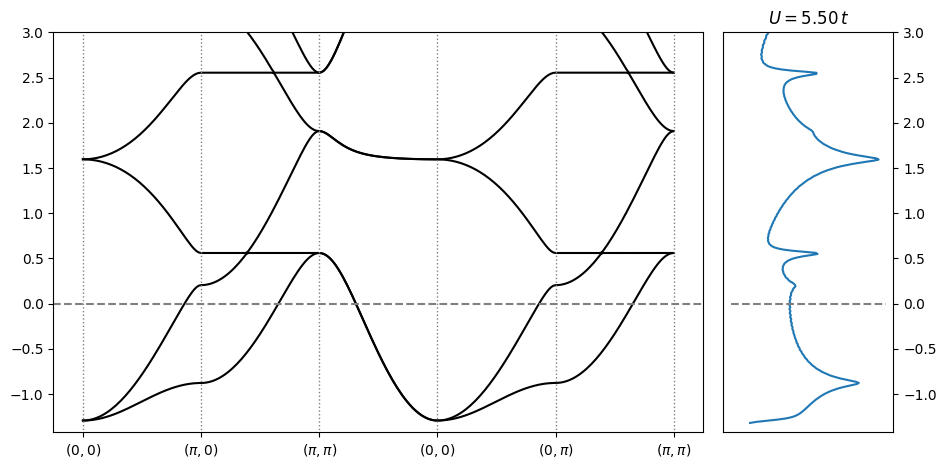

1.5002958726195


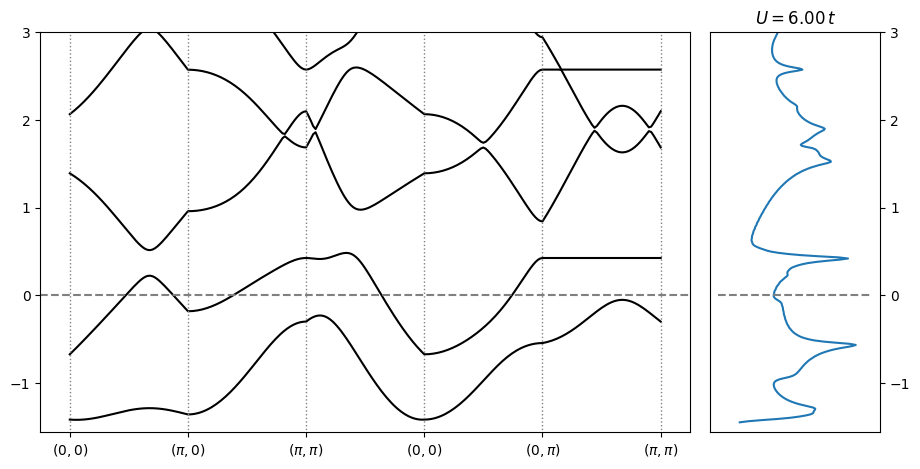

1.5009475741194007


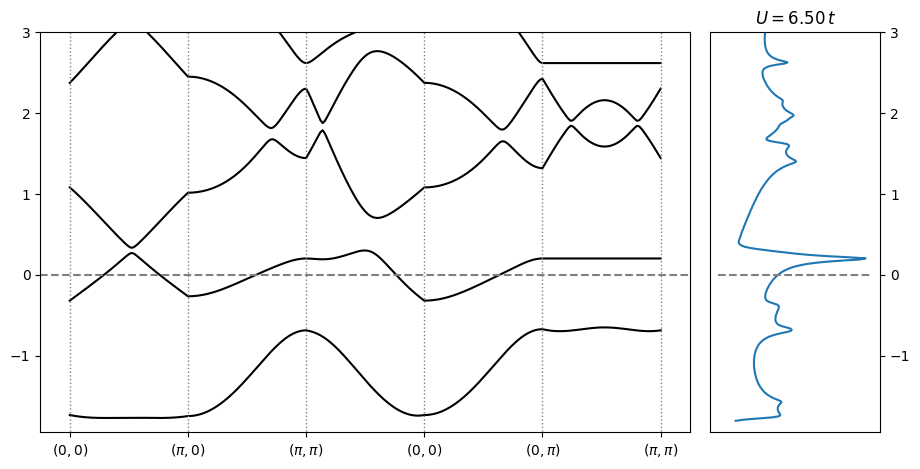

1.4997735290151024


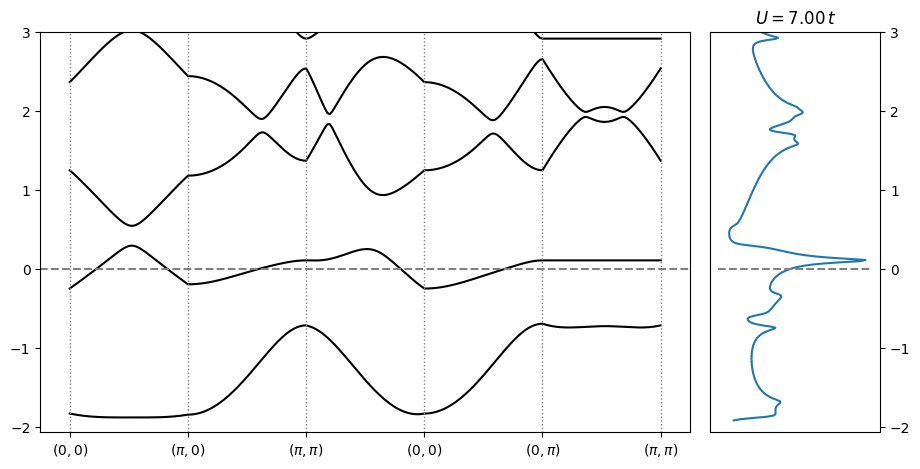

1.4993411835090944


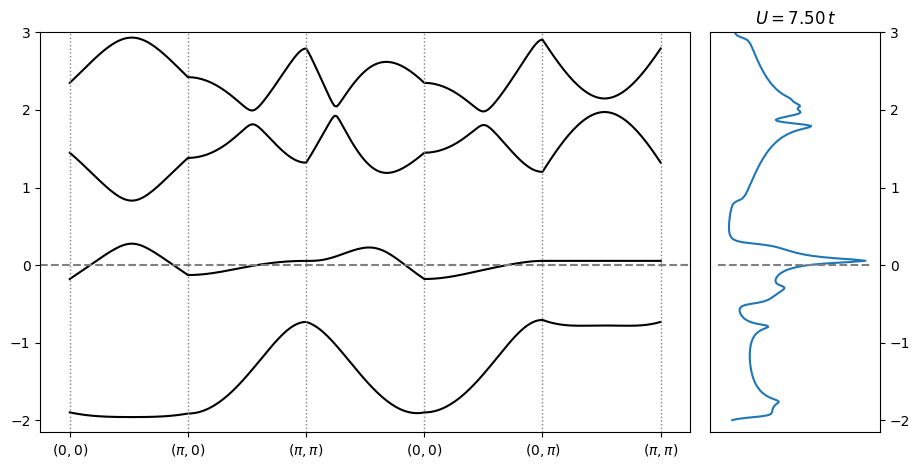

1.498814875194301


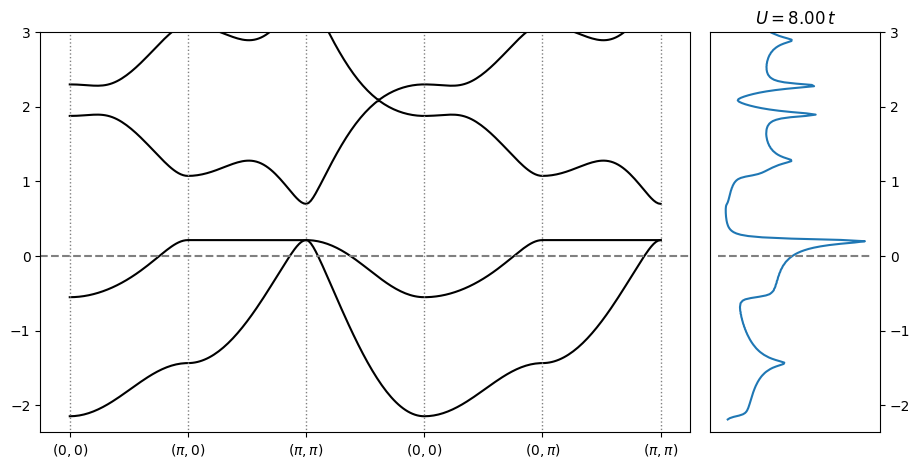

In [93]:
Nk=100
pars = dict(t=1,U=0,J=0,t_pxpy=0,t_pp=0,t_dd=0,J_pxpy=0)
OBJ = HF_Q.HF_qQ(Nk,pars)

def lorentz(x,gamma):
    return -1/np.pi*(1./(x+1j*gamma)).imag

special_vls = [4,4.5,5,5.5,6,6.5,7,7.5,8]
#special_vls = [8]

for ii in range(U_l.shape[0]):
    if (U_l[ii] in special_vls):
        Dd=Dd_l[ii]*np.exp(1j*a_d_l[ii])
        Dpx=Dpx_l[ii]*np.exp(1j*a_px_l[ii])
        Dpy=Dpy_l[ii]*np.exp(1j*a_py_l[ii])
        #
        scpp=dict(Dd=Dd,Dpx=Dpx,Dpy=Dpy,mud=mud_l[ii],mupx=mupx_l[ii],mupy=mupy_l[ii])
        #print(abs(Dd),abs(Dpx),abs(Dpy),np.angle(Dd),np.angle(Dpx),np.angle(Dpy))
        #print(mupx_l[ii],mupy_l[ii],qx_l[ii],qy_l[ii])
        Ek,phik,_ = OBJ.make_H(scpp,[qx_l[ii],qy_l[ii]])


        #mus = np.linspace(np.min(Ek)*1.02,np.max(Ek)*1.02,500)
        #ns = np.zeros(mus.shape)
        
        #for cnt,muu in enumerate(mus):
        #    ns[cnt] = OBJ.filling_fast(Ek-muu,T=0.01)

        #compr = np.diff(ns) / abs(mus[0]-mus[1])
        oms = np.linspace(np.min(Ek)*1.02,np.max(Ek)*1.02,500)
        sp_fun = np.zeros(oms.shape)
        for cnt,om in enumerate(oms):
            sp_fun[cnt] = np.sum(lorentz(om-Ek,0.025).flatten())/OBJ.Nk**2
        #
        fig=plt.figure(figsize=(10,5))
        left, width = 0.07, 0.65
        bottom, height = 0.1, .8
        bottom_h = left_h = left+width+0.02
        
        rect_cones = [left, bottom, width, height]
        rect_box = [left_h, bottom, 0.17, height]
        
        ax = plt.axes(rect_cones)
        ax2 = plt.axes(rect_box)
        plt.title(r'$U=%.2f\,t$'%U_l[ii])
        print(OBJ.filling_fast(Ek,T=0.01))
        #
        k0 = OBJ.Nk//2-1
        kP = OBJ.Nk-1
        OBJ.klin[k0]
        Epath=np.concatenate((Ek[k0:,k0,:],Ek[kP,k0+1:,:]),axis=0)
        Epath = np.concatenate((Epath,np.einsum('xxl->xl',Ek[k0:-1,k0:-1,:])[::-1,:]),axis=0)
        Epath = np.concatenate((Epath,Ek[k0,k0+1:,:]),axis=0)
        Epath = np.concatenate((Epath,Ek[k0+1:,kP,:]),axis=0)
        
        ax.plot(Epath,color="black")
        
        ylim=ax.get_ylim()
        kpoints = [0,OBJ.Nk//2,OBJ.Nk,3/2*OBJ.Nk,2*OBJ.Nk,5/2*OBJ.Nk]
        for vv in kpoints:
            ax.vlines(vv,ylim[0],ylim[1],linestyles='dotted',color='gray',lw=1)
        ax.set_ylim(ylim)
        
        xlim=ax.set_xlim()
        ax.hlines(0,xlim[0],xlim[1],linestyles='dashed',color='gray')
        ax.set_xlim(xlim)
        
        ax.set_xticks(kpoints)
        ax.set_xticklabels([r'$(0,0)$',r'$(\pi,0)$',r'$(\pi,\pi)$',r'$(0,0)$',r'$(0,\pi)$',r'$(\pi,\pi)$'])
        #
        ax2.sharey(ax)
        #ax2.plot(compr,mus[:-1])
        ax2.plot(sp_fun,oms)
        ax2.yaxis.tick_right()
        ax2.set_xticks([])
        D=3
        ax2.set_ylim(-min(D,abs(np.min(Ek)))*1.1,D)
        xlim=ax2.get_xlim()
        ax2.hlines(0,xlim[0],xlim[1],linestyles='dashed',color='gray')
        plt.show()